# PCA : Principal component analysis under the hood

## References

이론

* [wikipedia/Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)
* 공돌이의 수학정리노트
  - [공분산 행렬의 의미와 PCA](https://www.youtube.com/watch?v=jNwf-JUGWgg)
  - [공돌이의 수학정리노트 / 4. 선형대수학 / 09 주성분분석 (PCA)](https://wikidocs.net/7646)
* [다크프로그래머 /선형대수학 #6 주성분분석(PCA)의 이해와 활용](https://darkpgmr.tistory.com/110)

코드 

* Minsuk Heo 허민석
  - [youtube/PCA algorithm step by step with python code](https://www.youtube.com/watch?v=xebPVQ1f7nM&feature=youtu.be)
  - [github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca](https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb)★

## 1. Data

In [1]:
import pandas as pd

# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [2]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


### Get feature and labels

In [3]:
X = df[ ['calory', 'breakfast', 'lunch', 'dinner', 'exercise'] ]
Y = df[ ['body_shape'] ]

### Rescaling

PCA에서는 데이터 rescaling이 중요하다!

In [6]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
print( X_std )

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


C:\Users\Junho\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Junho\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 2. Get Covariance Matrix

[ref](https://wikidocs.net/7646#2_1)

$$
\sum = { X^TX \over n }
$$

In [7]:
import numpy as np

features = X_std.T
covariance_matrix = np.cov( features )
print( covariance_matrix )

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


## 3. Get Eigen Vectors and Eigen Values from Covariance Matrix

In [11]:
eig_vals, eig_vecs = np.linalg.eig( covariance_matrix )

print( "Eigenvectors\n", eig_vecs )
print()
print( "Eigenvalues\n", eig_vals )

Eigenvectors
 [[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]

Eigenvalues
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [12]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)

0.7318321731427544

## 4. Project data point onto selected Eigen Vector

In [14]:
projected_X = X_std.dot( eig_vecs.T[0] ) 

In [15]:
print( projected_X )

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [17]:
result = pd.DataFrame( projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result.head(10)

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


## 5. Visualize

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PCA result')

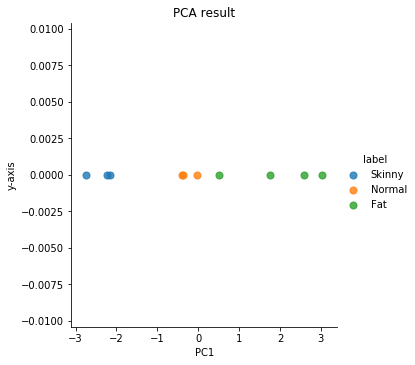

In [19]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

## Bonus


### to 2DIM


In [46]:
eig_vecs

array([[ 0.508005  ,  0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [ 0.44660335,  0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [ 0.38377913, -0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [ 0.42845209,  0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [-0.46002038,  0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [47]:
eig_vecs[:,:2]

array([[ 0.508005  ,  0.0169937 ],
       [ 0.44660335,  0.36890361],
       [ 0.38377913, -0.70804084],
       [ 0.42845209,  0.53194699],
       [-0.46002038,  0.2816592 ]])

In [54]:
projected_X2 = X_std.dot( eig_vecs[:,:2] ) 
print( projected_X2 )


[[-2.22600943  0.54936514]
 [-0.0181432   0.23871898]
 [ 1.76296611 -0.36868681]
 [-2.73542407 -0.4544983 ]
 [ 3.02711544  0.41305057]
 [-2.14702579  0.83449111]
 [-0.37142473  1.05380594]
 [ 2.59239883  0.3985085 ]
 [-0.39347815 -2.09420397]
 [ 0.50902498 -0.57055116]]


Text(0.5, 1.0, 'PCA result')

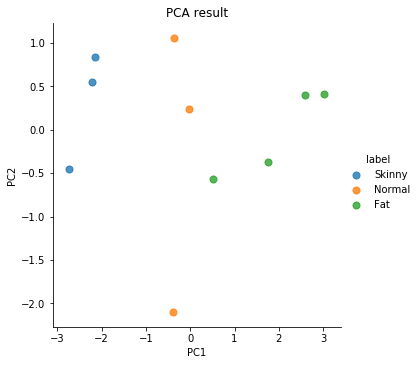

In [55]:
result2 = pd.DataFrame( projected_X2, columns=['PC1', 'PC2'])
result2['label'] = Y
result2.head(10)

sns.lmplot('PC1', 'PC2', data=result2, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')


### with scikit-learn

In [62]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
pca = decomposition.PCA( n_components=2 )
sklearn_pca_x = pca.fit_transform( X_std )

C:\Users\Junho\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Junho\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [63]:
sklearn_pca_x

array([[-2.22600943, -0.54936514],
       [-0.0181432 , -0.23871898],
       [ 1.76296611,  0.36868681],
       [-2.73542407,  0.4544983 ],
       [ 3.02711544, -0.41305057],
       [-2.14702579, -0.83449111],
       [-0.37142473, -1.05380594],
       [ 2.59239883, -0.3985085 ],
       [-0.39347815,  2.09420397],
       [ 0.50902498,  0.57055116]])

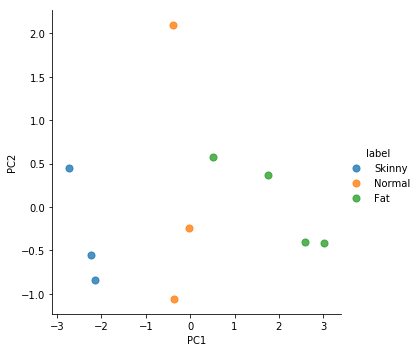

In [64]:
sklearn_rst = pd.DataFrame( sklearn_pca_x, columns=['PC1', 'PC2'])
sklearn_rst['label'] = Y

sns.lmplot('PC1', 'PC2', data=sklearn_rst, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color